In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


# Import and Preparation

In [2]:
df_train = pd.read_csv('../input/train.csv', index_col='PassengerId')
df_test = pd.read_csv('../input/test.csv', index_col='PassengerId')
df_gender_sub = pd.read_csv("../input/gender_submission.csv", index_col='PassengerId')

In [3]:
# Storing the target separately
Survived = df_train.loc[:,'Survived']
df_train = df_train.drop(['Survived'], axis=1).copy()

# Saving index for train test split 
train_index = df_train.index
test_index = df_test.index

# Concate the two datasets
df_all = pd.concat([df_train, df_test])

# dont needed anymore
##del df_train
##del df_test

# Create new feature Family true/false
df_all.loc[:,'Family'] = ((df_all['SibSp'] > 0) | (df_all['Parch'] > 0)).replace(True, 1, inplace=False)
df_all.loc[:,'Family'] = df_all.loc[:,'Family'].astype(int)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae88c54da0>,
      dtype=object)

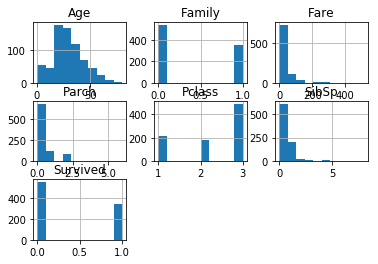

In [4]:
pd.concat([df_all.loc[train_index,:],Survived], axis=1).hist()



# Missing Values

In [5]:
# Function for nullanalysis
def nullAnalysis(df):
    tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})

    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
    return tab_info

In [6]:
# Show the null values
nullAnalysis(df_all)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
column type,int64,object,object,float64,int64,int64,object,float64,object,object,int64
null values (nb),0,0,0,263,0,0,0,1,1014,2,0
null values (%),0,0,0,20.0917,0,0,0,0.0763942,77.4637,0.152788,0


## Age

In [7]:
# First 10 datarows where age is null
df_all[df_all.loc[:,'Age'].isnull()].head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,,,
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0
20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0
27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0
30,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,0
32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1
33,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,0
37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0


In [8]:
# Average age overall
print("Average age of a passengers: ", round(df_all.loc[:,'Age'].agg('mean'),0))

Average age of a passengers:  30.0


In [9]:
# Average age per class
df_all.groupby('Pclass')['Age'].agg('mean')

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

We will use the average age of the corresponding class to fill the missing passenger ages. This would be the best fit for that problem.

In [10]:
# Setting the average age of each class for the missing values inside the corresponding class
df_all.loc[(df_all['Age'].isnull()) & (df_all['Pclass'] == 1), ['Age']] = round(df_all.groupby('Pclass')['Age'].agg('mean')[1],0)
df_all.loc[(df_all['Age'].isnull()) & (df_all['Pclass'] == 2), ['Age']] = round(df_all.groupby('Pclass')['Age'].agg('mean')[2],0)
df_all.loc[(df_all['Age'].isnull()) & (df_all['Pclass'] == 3), ['Age']] = round(df_all.groupby('Pclass')['Age'].agg('mean')[3],0)

## Fare


In [11]:
df_all[df_all['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


One passenger has not payed his Ticket, or is even not recorded. To fill the gab I will use the mean ticket price for his third class ticket: 13.30 

In [12]:
df_all.groupby('Pclass', as_index=False)['Fare'].agg('mean')

,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [13]:
# Setting Fare to mean fare of pclass
df_all.loc[1044,['Fare']] = 13.30

## Cabin

In [14]:
# Show all Cabins with NaN data
df_all.loc[(df_all['Cabin'].isnull())] 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
6,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q,0
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1
13,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,0
14,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,1


In [15]:
# Fill the nan data with coresponding cabin out of the Pclass
#df_all.loc[df_all.loc[:,'Pclass'] == 3,['Cabin']].fillna(method='bfill')

#df_all.loc[:,'Cabin'].fillna(method='ffill')

In [16]:
df_all.groupby('Pclass')['Age','Parch','Fare'].agg(['max','min','mean'])

Age                     ...          Fare                
         max   min       mean    ...           max  min       mean
Pclass                           ...                              
1       80.0  0.92  39.140619    ...      512.3292  0.0  87.508992
2       70.0  0.67  29.535199    ...       73.5000  0.0  21.179196
3       74.0  0.17  24.870240    ...       69.5500  0.0  13.302885

[3 rows x 9 columns]

In [17]:
# Group by Pclasses
df_all.groupby('Pclass').agg('count')

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
Pclass,,,,,,,,,,
1,323,323,323,323,323,323,323,256,321,323
2,277,277,277,277,277,277,277,23,277,277
3,709,709,709,709,709,709,709,16,709,709


In [18]:
# Sex Distribution
df_all.groupby(['Sex']).agg('count')

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
Sex,,,,,,,,,,
female,466,466,466,466,466,466,466,141,464,466
male,843,843,843,843,843,843,843,154,843,843


# Visualizing Distribution

## Gender Distribution

In [19]:
df_all.groupby(['Parch']).agg('count')

,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked,Family
Parch,,,,,,,,,,
0,1002,1002,1002,1002,1002,1002,1002,205,1000,1002
1,170,170,170,170,170,170,170,56,170,170
2,113,113,113,113,113,113,113,29,113,113
3,8,8,8,8,8,8,8,3,8,8
4,6,6,6,6,6,6,6,2,6,6
5,6,6,6,6,6,6,6,0,6,6
6,2,2,2,2,2,2,2,0,2,2
9,2,2,2,2,2,2,2,0,2,2


The feature **Cabin** seems to have some missing values.

## Gender Distribution by Ticket Class
Following will show the gender distribution by ticket class.

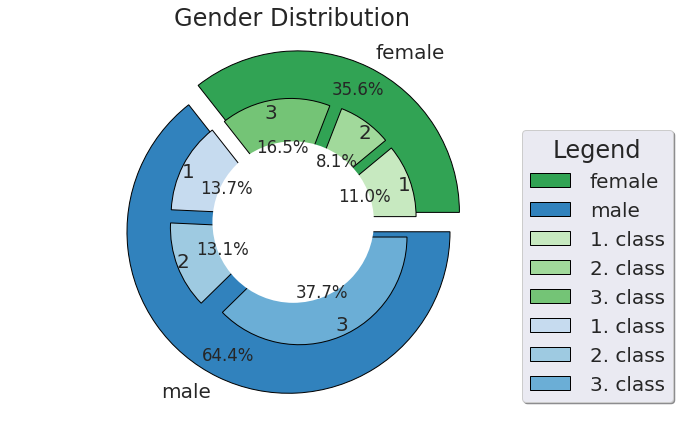

In [51]:
# Visualizing pie chart

fig, ax = plt.subplots(figsize=(10,7))

# Size and explsion
size_out = 3
size_in = 1
explode_out = (0.2,0.2)
explode_in = (0.3,0.3,0.3,0.3,0.3,0.3)

cmap = plt.get_cmap('tab20c')

outer_colors = cmap(np.array([8,0]))
inner_colors = cmap(np.array([11,10,9,3,2,1]))

patches1, texts1, autotexts1 = ax.pie(df_all.groupby(['Sex']).count().Name, radius=3, colors=outer_colors,
       labels=df_all.groupby(['Sex']).count().Name.index,autopct='%1.1f%%',pctdistance=0.85,
       wedgeprops=dict(width=size_out, edgecolor='black'),
       explode = explode_out)

patches2, texts2, autotexts2 = ax.pie(df_all.groupby(['Sex','Pclass']).count().Name, radius=2, colors=inner_colors,
       labels=[1,2,3,1,2,3],autopct='%1.1f%%', labeldistance=0.88,pctdistance=0.55,
       wedgeprops=dict(width=size_in, edgecolor='black'),
      explode = explode_in)

# Centre Cirle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#plt.rcParams['font.size'] = 10.0
#plt.rc_context


# Define the labels on the outer plot
for t in texts1:
    t.set_size('smaller')
for t in autotexts1:
    t.set_size('x-small')
#autotexts1[0].set_color('y')


# Define the labels on the inner plot
for t in texts2:
    t.set_size('smaller')
for t in autotexts2:
    t.set_size('x-small')
#autotexts2[0].set_color('d')


# Setting legend
ax.legend(loc='lower right', bbox_to_anchor=(0.7, 0., 0.5, 0.5), shadow=1,title='Legend',
          handletextpad=1, labelspacing=0.5 , fontsize='small', labels=['female','male','1. class','2. class', '3. class','1. class','2. class', '3. class'])


ax.set(aspect="equal", title='Gender Distribution')
plt.axis('equal')
plt.show()

Here you can see the diffrent gender distributions to the ticket classes 1 to 3.

## Age Distribution by Ticket Class
Now the age distribution per ticket class will be visualized to get a better overview about the ages in each ticket class.

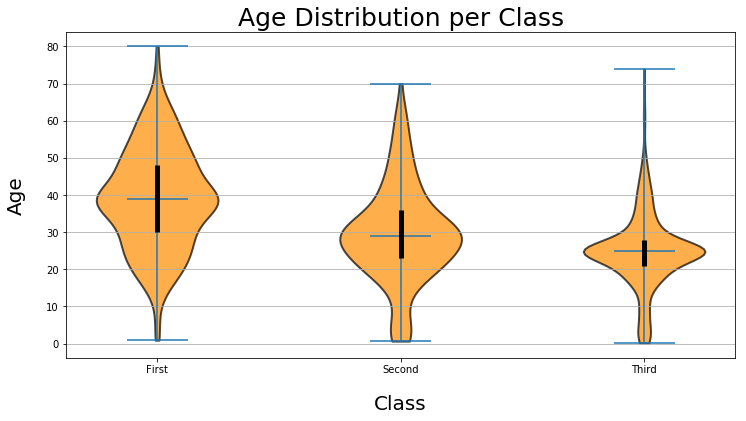

In [21]:
# Sclicing the three classes
df_firstclass_ages = df_all[df_all.loc[:,'Pclass'] == 1]['Age'].copy()
df_secondclass_ages = df_all[df_all.loc[:,'Pclass'] == 2]['Age'].copy()
df_thirdclass_ages = df_all[df_all.loc[:,'Pclass'] == 3]['Age'].copy()

# Combining all classes in an array
df_all_class_ages =[df_firstclass_ages.values,
                    df_secondclass_ages.values,
                    df_thirdclass_ages.values]

# Font dictionary
font = {'color':  'black',
        'weight': 'normal',
        'size': 18,
}

# Building the figure and the axes for the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6) )

# plot violin plot
parts = axes.violinplot(df_all_class_ages
                   ,showmeans=False,
                    showmedians=True)
axes.set_title('Age Distribution per Class', fontdict=font, fontsize=25)

# Styling every violin in the graph
for pc in parts['bodies']:
    pc.set_facecolor('#FF8C00')
    pc.set_edgecolor('#000000')
    pc.set_linewidth(2)
    pc.set_alpha(0.7)


# adding horizontal grid lines
axes.yaxis.grid(True)
axes.set_xticks([y + 1 for y in range(len(df_all_class_ages))])
axes.set_xlabel('Class',fontdict=font, labelpad=20, size=20)
axes.set_ylabel('Age', fontdict=font,labelpad=20, size=20)


axes.vlines(1, df_firstclass_ages.describe()['25%'], df_firstclass_ages.describe()['75%'], color=['#000000'], linestyle='-', lw=5)
axes.vlines(2, df_secondclass_ages.describe()['25%'], df_secondclass_ages.describe()['75%'], color=['#000000'], linestyle='-', lw=5)
axes.vlines(3, df_thirdclass_ages.describe()['25%'], df_thirdclass_ages.describe()['75%'], color=['#000000'], linestyle='-', lw=5)
#axes.vlines(2, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

# add x-tick labels
plt.setp(axes, xticks=[y + 1 for y in range(len(df_all_class_ages))],
         xticklabels=['First', 'Second','Third'])


plt.show()

The first class has a wide range of passengers with a mean age of nearly 40. This looks different in the second class. The passengers have at least the same range of ages but the mean age here is more in the area of 30 years. The same is with third class but here is the age range not so high as with the other classes. Its even much smaller outside the mean age of 25. The most passengers in the third class are around 25 years old. 

## Survivor Distribution


### Male and Female Survivor
According to the distribution of 64.5% man and 35.6% women, I will now show the distribution of survivors broken down by gender. This distribution only shows the survival data for 891 passengers (from training data) and not for all ship passengers.  


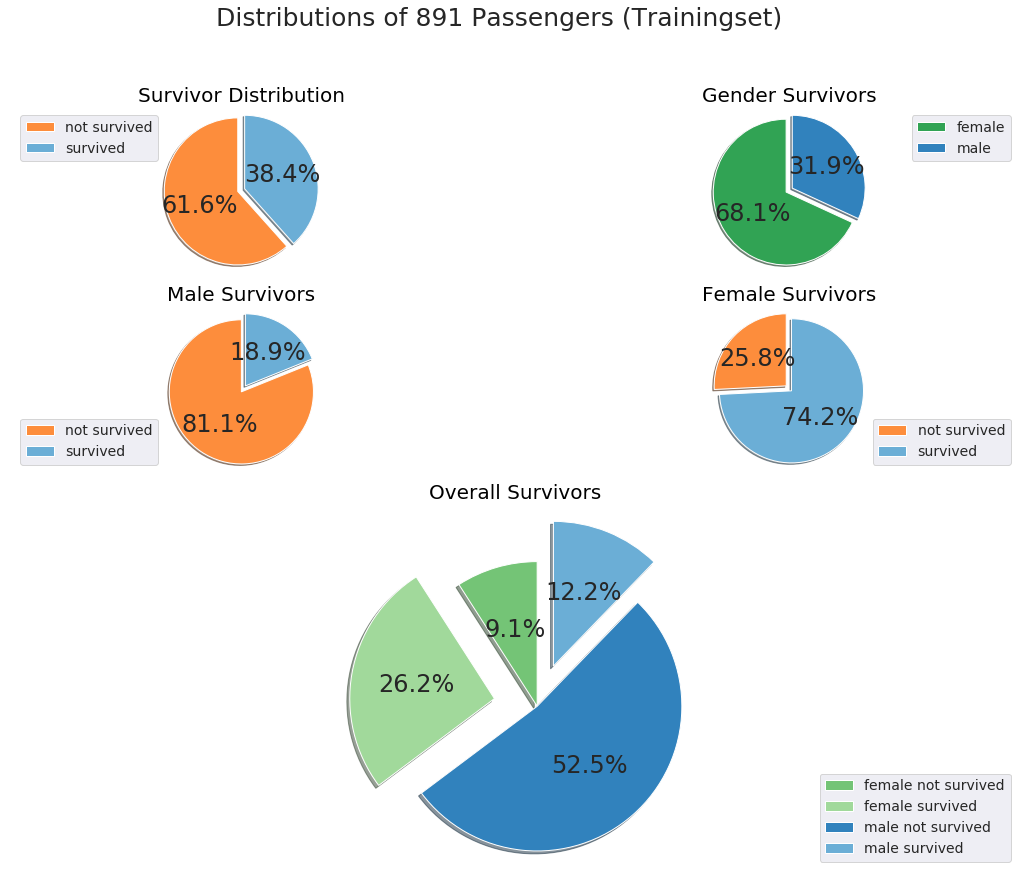

In [23]:
# The dataset with survived information
df_survivalinfo = pd.concat([df_all.loc[train_index,:], Survived], axis=1)

# Survival distribution per Sex
gp_survived_gender = df_survivalinfo.groupby(['Survived','Sex'])['Name'].count()[1]

# Gender Survival
gp_gender_survived = df_survivalinfo.groupby(['Sex','Survived']).count()['Name']

# Survival distribution Y/N 
gp_survived_yn = df_survivalinfo.groupby(['Survived']).agg('count')['Name']

# Survival total female / male 
gp_survival_total = df_survivalinfo.groupby(['Sex','Survived']).count().xs('Name', axis=1)


# Labels and size based on survival group by (df_survivalinfo)
#labels_suvinf = ['not suvived','survived']
sizes_suvinf = [gp_survived_yn[y] for y in range(len(gp_survived_yn))]
explode_suvinf = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

# Labels and size based on gender group by (gp_sex_survived)
labels_sexinf = [gp_survived_gender.index[y] for y in range(len(gp_survived_gender.index))]
sizes_sexinf = [gp_survived_gender[y] for y in range(len(gp_survived_gender))]
explode_sexinf = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

# Labels and size MALE Survivor Distribution
labels_maleinf = [gp_gender_survived['male'].index[y] for y in range(len(gp_gender_survived['male'].index))]
sizes_maleinf = [gp_gender_survived['male'][y] for y in range(len(gp_gender_survived['male']))]
explode_maleinf = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

# Labels and size FEMALE Survivor Distribution
labels_femaleinf = [gp_gender_survived['female'].index[y] for y in range(len(gp_gender_survived['female'].index))]
sizes_femaleinf = [gp_gender_survived['female'][y] for y in range(len(gp_gender_survived['female']))]
explode_femaleinf = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

# Labels and size total survival data
labels_totalsuvinf = [gp_survival_total.index[y] for y in range(len(gp_gender_survived.index))]
sizes_totalsuvinf = [gp_survival_total[y] for y in range(len(gp_survival_total))]
explode_totalsuvinf = (0.0, 0.3,0.0, 0.3)  # not survived (fm), survived(fm), not survived(m), survived(m)


# Font dictionary
font = {'color':  'black',
        'weight': 'normal',
        #'size': 15,
        'fontsize':15
}

# Color maps for the pies
cmap = plt.get_cmap('tab20c')
survivedcolor = cmap(np.array([5,1]))
survivorallcolor = cmap(np.array([9,10,0,1]))

# Figure and axes of the plot / 4 * 2 plots 
gridsize = (4,2)
fig1 = plt.figure(figsize=(18,14))
ax1 = plt.subplot2grid(gridsize, (0,0))
ax2 = plt.subplot2grid(gridsize, (0,1))
ax3 = plt.subplot2grid(gridsize, (1,0))
ax4 = plt.subplot2grid(gridsize, (1,1))
ax5 = plt.subplot2grid(gridsize, (2,0), colspan= 2, rowspan= 2)

## fig1 configs
fig1.suptitle('Distributions of 891 Passengers (Trainingset)', fontsize=25)

## ax1 
# Define first pie for survival true falls
ax1.pie(sizes_suvinf, 
        explode=explode_suvinf,
        #labels=labels_suvinf,
        autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=survivedcolor,
        labeldistance=1.15,
        pctdistance=0.55
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax1.fontdict=font
ax1.legend(loc='upper left',fontsize='14',labels=('not survived', 'survived'))
ax1.set_title('Survivor Distribution', fontdict=font, fontsize=20)

## ax2 
# Define second pie for sex to survival
ax2.pie(sizes_sexinf, 
        explode=explode_sexinf,
        #labels=labels_sexinf,
        autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=outer_colors,
        labeldistance=1.15,
        pctdistance=0.55)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax2.fontdict=font
ax2.legend(loc='upper right', fontsize='14', labels=labels_sexinf )
ax2.set_title('Gender Survivors', fontdict=font, fontsize=20)

ax3.pie(sizes_maleinf, 
        explode=explode_maleinf,
        #labels=labels_sexinf,
        autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=survivedcolor,
        labeldistance=1.15,
        pctdistance=0.55)
#ax3.fontdict=font
ax3.legend(loc='lower left', fontsize='14', labels=['not survived','survived'] )
ax3.set_title('Male Survivors', fontdict=font, fontsize=20)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


ax4.pie(sizes_femaleinf, 
        explode=explode_femaleinf,
        #labels=labels_sexinf,
        autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=survivedcolor,
        labeldistance=1.15,
        pctdistance=0.55)
#ax4.fontdict=font
ax4.legend(loc='lower right', fontsize='14', labels=['not survived','survived'] )
ax4.set_title('Female Survivors', fontdict=font, fontsize=20)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


ax5.pie(sizes_totalsuvinf, 
        explode=explode_totalsuvinf,
        #labels=labels_totalsuvinf,
        autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=survivorallcolor,
        labeldistance=1.15,
        pctdistance=0.55)
ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax4.fontdict=font
ax5.legend(loc='lower right', fontsize='14', labels=['female not survived','female survived','male not survived','male survived'] )
ax5.set_title('Overall Survivors', fontdict=font, fontsize=20)
ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In total of the 891 passenger informations are 62% that did not made it out of the tragedy and died in the open water.  These survivors are divided into 68.1% women and 31.9% man. It is clearly visible that a lot of female passengers have been rescued. If we look closer into the male passengers data (third pie chart: "Male Survivors), 81% of the male passengers did not survive. In conctract, 74% female passengers survived. That's according to the gentleman's behavior of that time. This situation is best described by a quote of sir ....


68% man and 32% women. So at least a lot of male passengers on board. 




### Distribution of  Ticket Class to Survival


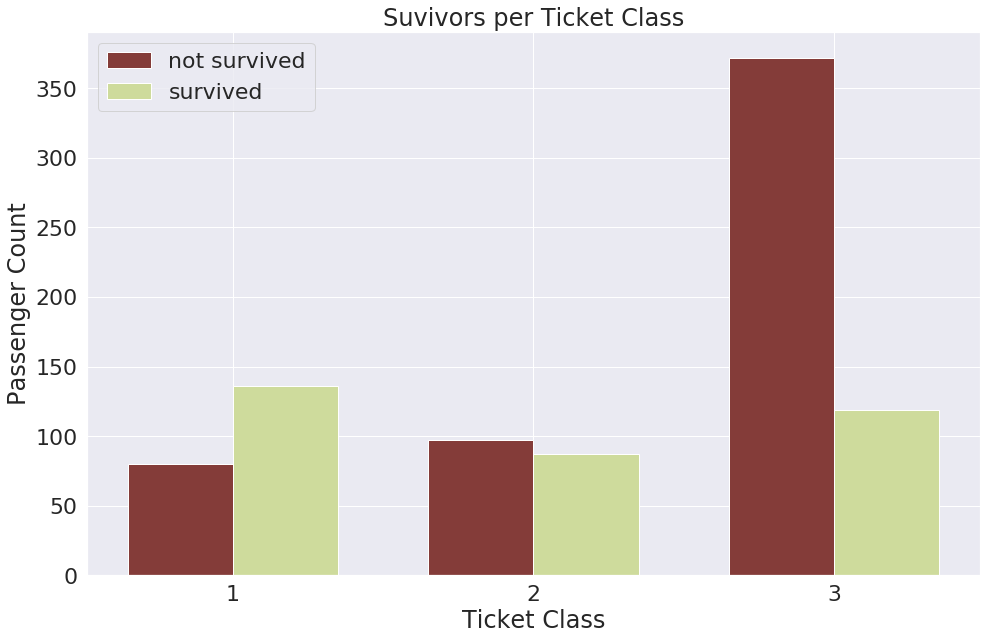

In [53]:
# Grouped by Survived and Pclass
gp_survpclass = df_survivalinfo.groupby(['Survived','Pclass'])['Name'].count()

gridsize = (1,2)
fig1 = plt.figure(figsize=(16,10))
ax1 = plt.subplot2grid(gridsize, (0,0), colspan=2, rowspan=1)

# Bar chart design
bar_width = 0.35
cmap = plt.get_cmap('tab20b')

survbarcol = cmap(np.array([7]))
nsurvbarcol = cmap(np.array([12]))

barindex = gp_survpclass[0].index   # Group by index of bar plot data
xtickslables = [barindex[y] for y in range(len(gp_survpclass[0].index))]



ax1.bar(barindex
        ,gp_survpclass[0].values
        ,bar_width
        ,color=nsurvbarcol
        )

ax1.bar(barindex + bar_width
        ,gp_survpclass[1].values
        ,bar_width
        ,color=survbarcol)

ax1.set_xlabel('Ticket Class')
ax1.set_ylabel('Passenger Count')
ax1.set_title('Suvivors per Ticket Class')
ax1.set_xticks(barindex + bar_width / 2)
ax1.set_xticklabels(xtickslables)
ax1.legend(labels=('not survived','survived'))

fig.tight_layout()
plt.show()

In [ ]:
ptbl = pd.DataFrame.pivot_table(df_survivalinfo, values=['Fare', 'Survived'], index=['Pclass'],
                     aggfunc={'Survived': ['sum'], 'Fare': [min,max,np.mean]})

ptbl


### Gaussian distrbution for age and fare price zu survived = 1

https://matplotlib.org/gallery/statistics/histogram_multihist.html#sphx-glr-gallery-statistics-histogram-multihist-py

Am Ende müssen sich alle Eingerenzungen durch die Visualisierungen in den Prediction Model wiederfinden.
(z.B.: min age, max age, mean age, in der Klasse xyz sorgt dafpr, dass du eher überlebts ...)

In [ ]:
# Pivot for age and fare
ptbl_survived = pd.DataFrame.pivot_table(df_survivalinfo, values=['Fare', 'Age', 'Survived'], index=['Sex', 'Pclass'],
                     aggfunc={'Fare': np.mean,'Age': [min, max, np.mean], 'Survived': ['sum']})
ptbl_survived

In [ ]:
df_all_survived.groupby(['Age','Survived']).agg('count')

### Ticketprice to Survival

### Scatter plot mit zwei features und dem dritten als Farbe der dots und größe der dots


# Schrottsammler


### Violin Plotts with Seaborn

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8) )

# Font dictionary
font = {'color':  'black',
        'weight': 'normal',
        'size': 18,
}

sns.set(style="darkgrid", font_scale=2)

ax = sns.violinplot(x='Pclass', y='Age', data=df_all )

ax.set_title('Age Distribution per Class', fontsize=25)
ax.set_xlabel('Class',fontdict=font, labelpad=20, fontsize=20)
ax.set_ylabel('Age', fontdict=font,labelpad=20, fontsize=20)


### Age to Survived

https://matplotlib.org/gallery/statistics/boxplot_vs_violin.html#sphx-glr-gallery-statistics-boxplot-vs-violin-py

min age <br>
max age  <br>
mean age <br>

per class

boxplot je Pclass mit min age, max age, mean age

In [ ]:
df_two_features = [df_all['Age'].values,df_all['Fare'].values ]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# plot violin plot
axes.violinplot(df_two_features
                   ,showmeans=False,
                    showmedians=True)
axes.set_title('Age and Fare Distribution')

# adding horizontal grid lines
axes.yaxis.grid(True)
axes.set_xticks([y + 1 for y in range(len(df_two_features))])
axes.set_xlabel('Two separate features')
axes.set_ylabel('Observed values Age / Fare')

# add x-tick labels
plt.setp(axes, xticks=[y + 1 for y in range(len(df_two_features))],
         xticklabels=['Age', 'Fare'], )

plt.ylim(top=150)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=-20)  # adjust the bottom leaving top unchanged

plt.show()

### 4 Pie charts

In [ ]:
# The dataset with survived information
df_survivalinfo = pd.concat([df_all, Survived], axis=1)

# Survival distribution per Sex
gp_survived_gender = df_survivalinfo.groupby(['Survived','Sex'])['Name'].count()[1]

# Gender Survival
gp_gender_survived = df_survivalinfo.groupby(['Sex','Survived']).count()['Name']

# Survival distribution Y/N 
gp_survived_yn = df_survivalinfo.groupby(['Survived']).agg('count')['Name']



# Labels and size based on survival group by (df_survivalinfo)
#labels_suvinf = ['not suvived','survived']
sizes_suvinf = [gp_survived_yn[y] for y in range(len(gp_survived_yn))]
explode_suvinf = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

# Labels and size based on gender group by (gp_sex_survived)
labels_sexinf = [gp_survived_gender.index[y] for y in range(len(gp_survived_gender.index))]
sizes_sexinf = [gp_survived_gender[y] for y in range(len(gp_survived_gender))]
explode_sexinf = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

# Labels and size MALE Survivor Distribution
labels_maleinf = [gp_gender_survived['male'].index[y] for y in range(len(gp_gender_survived['male'].index))]
sizes_maleinf = [gp_gender_survived['male'][y] for y in range(len(gp_gender_survived['male']))]
explode_maleinf = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

# Labels and size FEMALE Survivor Distribution
labels_femaleinf = [gp_gender_survived['female'].index[y] for y in range(len(gp_gender_survived['female'].index))]
sizes_femaleinf = [gp_gender_survived['female'][y] for y in range(len(gp_gender_survived['female']))]
explode_femaleinf = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')


# Font dictionary
font = {'color':  'black',
        'weight': 'normal',
        #'size': 15,
        'fontsize':15
}

cmap = plt.get_cmap('tab20c')
survivedcolor = cmap(np.array([5,1]))

# Figure and axes1 and axes2 of the plot
gridsize = (4,2)
fig1 = plt.figure(figsize=(18,14))
ax1 = plt.subplot2grid(gridsize, (0,0))
ax2 = plt.subplot2grid(gridsize, (0,1))
ax3 = plt.subplot2grid(gridsize, (1,0))
ax4 = plt.subplot2grid(gridsize, (1,1))


## ax1 
# Define first pie for survival true falls
ax1.pie(sizes_suvinf, 
        explode=explode_suvinf,
        #labels=labels_suvinf,
        autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=survivedcolor,
        labeldistance=1.15,
        pctdistance=0.55
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.fontdict=font
ax1.legend(loc='upper left',fontsize='small',labels=('not survived', 'survived'))
ax1.set_title('Survivor Distribution', fontdict=font, fontsize=20)

## ax2 
# Define second pie for sex to survival
ax2.pie(sizes_sexinf, 
        explode=explode_sexinf,
        #labels=labels_sexinf,
        autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=outer_colors,
        labeldistance=1.15,
        pctdistance=0.55)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.fontdict=font
ax2.legend(loc='upper right', fontsize='small', labels=labels_sexinf )
ax2.set_title('Gender Survivor Distribution', fontdict=font, fontsize=20)

ax3.pie(sizes_maleinf, 
        explode=explode_maleinf,
        #labels=labels_sexinf,
        autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=survivedcolor,
        labeldistance=1.15,
        pctdistance=0.55)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.fontdict=font
ax3.legend(loc='lower left', fontsize='small', labels=['not survived','survived'] )
ax3.set_title('Male Survivor Distribution', fontdict=font, fontsize=20)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


ax4.pie(sizes_femaleinf, 
        explode=explode_femaleinf,
        #labels=labels_sexinf,
        autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=survivedcolor,
        labeldistance=1.15,
        pctdistance=0.55)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax4.fontdict=font
ax4.legend(loc='lower right', fontsize='small', labels=['not survived','survived'] )
ax4.set_title('Female Survivor Distribution', fontdict=font, fontsize=20)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.rcParams['font.size'] = 13.0
#plt.rc_context


plt.show()

## Ein weiterer Violin Plot

In [ ]:
df_two_features = [df_all['Age'].values,df_all['Fare'].values ]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# plot violin plot
axes.violinplot(df_two_features
                   ,showmeans=False,
                    showmedians=True)
axes.set_title('Age and Fare Distribution')

# adding horizontal grid lines
axes.yaxis.grid(True)
axes.set_xticks([y + 1 for y in range(len(df_two_features))])
axes.set_xlabel('Two separate features')
axes.set_ylabel('Observed values Age / Fare')

# add x-tick labels
plt.setp(axes, xticks=[y + 1 for y in range(len(df_two_features))],
         xticklabels=['Age', 'Fare'], )

plt.ylim(top=150)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=-20)  # adjust the bottom leaving top unchanged

plt.show()

In [ ]:
#df_fristclass_ages
#test= pd.DataFrame(df_all[df_all.loc[:,'Pclass'] == 1]['Age'].copy())
#test

firstclass = pd.DataFrame(df_all[df_all.loc[:,'Pclass'] == 1]['Age'].copy())
secondclass = pd.DataFrame(df_all[df_all.loc[:,'Pclass'] == 2]['Age'].copy())
thirdclass = pd.DataFrame(df_all[df_all.loc[:,'Pclass'] == 3]['Age'].copy())

df_firstclass_ages.rename

# violin plot
frame = [df_firstclass_ages
    ,df_secondclass_ages
    ,df_thirdclass_ages]

results = pd.concat(frame,axis =1)

results.columns = ['Firstclass_Age','Secondclass_Age','Thirdclass_Age']

In [ ]:
# violin plot
frame = [df_firstclass_ages
    ,df_secondclass_ages
    ,df_thirdclass_ages]

results = pd.concat(frame,axis =1)
results.rename(index=str, columns={"Age": "Age Firstclass"})

In [ ]:
# Concat Survived and training set 
fig = plt.figure(figsize=(12,10))
#gs = fig.add_gridspec(2, 2)
#ax1 = fig.add_subplot(gs[0, 0])
ax = fig.add_subplot()



df_all_survived = pd.concat([df_all.loc[train_index,:],Survived], axis=1)
df_all_survived 


In [ ]:
n_groups = 10

# Mans value count per type
means_men = df_all.groupby(['Sex']).count().loc['male',:].values
#std_men = (2, 3, 4, 1, 2)

# Womens value count per type
means_women = df_all.groupby(['Sex']).count().loc['female',:].values
#std_women = (3, 5, 2, 3, 3)



fig, ax = plt.subplots(figsize=(10,6))


index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='g',
                error_kw=error_config,
                label='Women')

ax.set_xlabel('Group')
ax.set_ylabel('Count')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Pclass','Name','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Family'))
ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
df_all.groupby(['Sex','Pclass']).count().index
df_all.groupby(['Sex','Pclass']).count()['female']
#index.levels[1]
#df_all.groupby(['Sex','Pclass']).count().index.levels[0]

In [ ]:
#df_all.groupby(['Sex']).count().Name
#df_all.groupby(['Sex','Pclass']).count().Name

df_all.groupby(['Sex','Pclass']).count().loc['female']

#df_all.groupby(['Sex','Pclass']).count().loc

#.loc['male']



In [ ]:
#df_all.pivot(columns='Sex', values=['Fare','Pclass'])
df_all.pivot(columns='Pclass', values=['Fare']) # very good one


In [ ]:
#df_all['Sex'].values
#Survived.values
df_all.groupby(['Sex']).count().Name.male

In [ ]:

#fig = plt.figure() # figure
#fig.suptitle('Gender Seperation on 'Titanic')

fig, ax = plt.subplots(1,1)
#my_plotter(ax,df_train['Sex'].values, Survived.values, {: 'x'})
my_bar(ax, df_train['Sex'].values, Survived.values, {'facecolor':'r'})


In [ ]:
#df_all[['Sex','Age','SibSp','Parch','Embarked','Family']].hist(Survived)
pd.concat([df_train, Survived], axis=1).hist()
#.hist()


In [ ]:
df_all.groupby(['Sex']).count().loc['female',:].values

In [ ]:
df_all.pivot("Pclass", "Age", "Sex")

#passengers = sns.load_dataset("flights")
#flights = df_all.pivot("Pclass", "Age", "Sex")
#ax = sns.heatmap(flights)